In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('50_Startups.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [2]:
df.drop('State', axis=1).corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Define the categorical column index
categorical_column = 'State'
categorical_column_index = df.columns.get_loc(categorical_column)

# Instantiate the ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [categorical_column_index])], remainder='passthrough')

# Fit the ColumnTransformer
df_transformed = ct.fit_transform(df)

# Get the fitted OneHotEncoder
fitted_encoder = ct.named_transformers_['encoder']

# Get the new column names after OneHotEncoding
one_hot_encoded_cols = fitted_encoder.get_feature_names_out([categorical_column])

# Get the names of the non-categorical columns
non_categorical_cols = df.columns.drop(categorical_column)

# Combine the new column names
new_column_names = list(one_hot_encoded_cols) + list(non_categorical_cols)

# Create the DataFrame with the new column names
df2 = pd.DataFrame(df_transformed, columns=new_column_names)

df2.head()

,State_California,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [9]:
df2.corr()

,State_California,State_Florida,State_New York,R&D Spend,Administration,Marketing Spend,Profit
State_California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
State_Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
State_New York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


In [ ]:
pip install seaborn

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

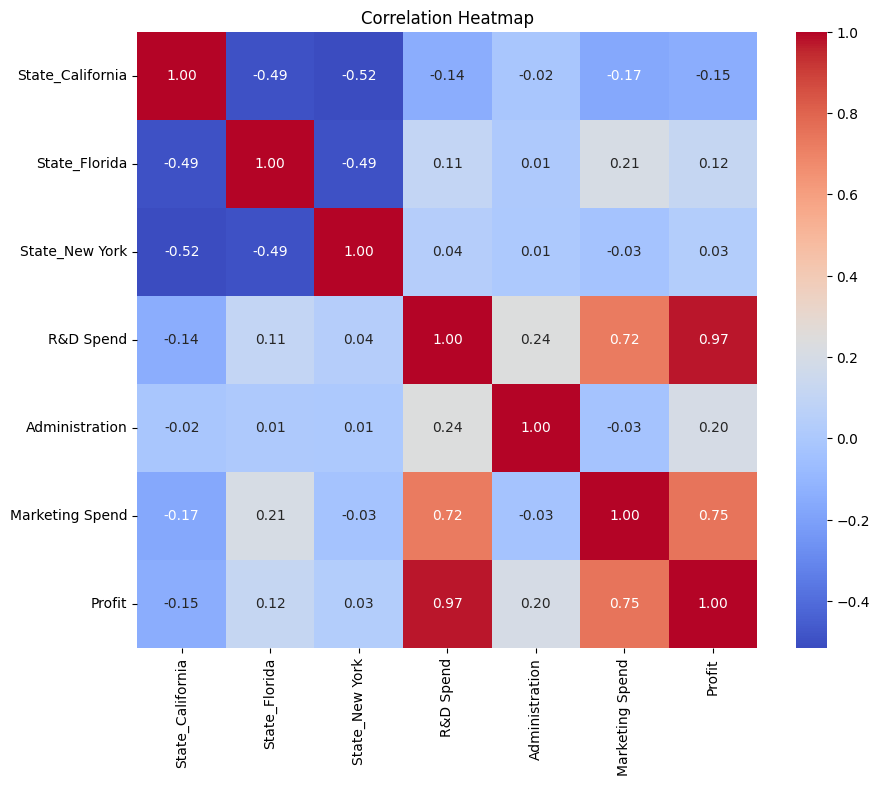

In [11]:
# If you want to create a heatmap of the correlation matrix:
corr_matrix = df2.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()